In [1]:
!pip install --quiet pennylane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 25.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.0/930.0 kB 31.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 48.2 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 45.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 91.3 MB/s eta 0:00:00:00:0100:01


In [2]:
import numpy as np
import pandas as pd
import pennylane as qml
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
from numpy import pi

In [3]:
df=pd.read_csv("/kaggle/input/breastttttttttt/data.csv")
df.drop(["id","Unnamed: 32"],axis=1,inplace=True)
LabelEncoder=LabelEncoder()
df.diagnosis=LabelEncoder.fit_transform(df.diagnosis)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
unique_values=df['diagnosis'].unique()
print(unique_values)

[1 0]


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('diagnosis', axis=1), df['diagnosis'], test_size=0.2, random_state=42)

In [6]:
chi_ls = []

for feature in X_train.columns:
    
    # create contingency table
    c = pd.crosstab(y_train, X_train[feature])
    
    # chi_test
    p_value = chi2_contingency(c)[1]
    chi_ls.append(p_value)

Text(0.5, 1.0, 'Feature importance based on chi-square test')

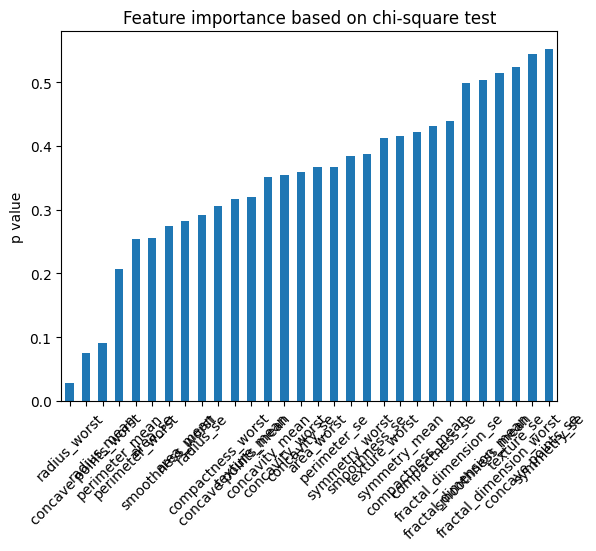

In [7]:
import matplotlib.pyplot as plt
pd.Series(chi_ls, index=X_train.columns).sort_values(ascending=True).plot.bar(rot=45)
plt.ylabel('p value')
plt.title('Feature importance based on chi-square test')

In [8]:
# select top 4

selected = pd.Series(chi_ls, index=X_train.columns).sort_values(
    ascending=True)[0:4].index

selected

Index(['radius_worst', 'concave points_worst', 'radius_mean',
       'perimeter_mean'],
      dtype='object')

In [9]:

X_train = X_train[selected]
X_test = X_test[selected]

X_train.head()

,radius_worst,concave points_worst,radius_mean,perimeter_mean
68,10.31,0.17500,9.029,58.79
181,26.68,0.29030,21.090,142.70
63,10.01,0.05087,9.173,59.20
248,12.25,0.06136,10.650,68.01
60,11.02,0.02579,10.170,64.55


In [10]:

X_test.head()

,radius_worst,concave points_worst,radius_mean,perimeter_mean
204,14.97,0.10150,12.47,81.09
70,24.86,0.17890,18.94,123.60
131,19.26,0.15140,15.46,101.70
431,12.88,0.07370,12.40,81.47
540,12.26,0.06918,11.54,74.65


In [11]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
X_train=mms.fit_transform(X_train)
X_test=mms.fit_transform(X_test)


In [12]:
X_train

array([[0.05964476, 0.60137457, 0.06552721, 0.07732252],
       [0.65791974, 0.9975945 , 0.65620256, 0.67420686],
       [0.04868065, 0.174811  , 0.07257946, 0.08023901],
       ...,
       [0.22776113, 0.11453608, 0.32317939, 0.30146536],
       [0.30560632, 0.62783505, 0.30799745, 0.30729834],
       [0.17038228, 0.25536082, 0.21984426, 0.20842225]])

#Without Noise
dev=qml.device("lightning.qubit",wires=9)

@qml.qnode(dev)
def circuit(x_train,x_test):
    for i in range(len(x_train)*2):
        qml.Hadamard(wires=i)
    
    qml.Hadamard(wires=(len(x_train)*2))
    
    #qml.Barrier(wires=(len(x_train)*2)+1)
        
    for i in range(len(x_train)):
            qml.RZ(x_train[i],wires=i)
            
    
    for i in range(len(x_test)):
            qml.RZ(x_test[i],wires=i+len(x_train))
            
    for i in range(len(x_train)):        
            if i==len(x_train)-1:
                qml.IsingXY(pi/3,wires=[i,i-len(x_train)+1])
            else:
                qml.IsingXY(pi/3,wires=[i,i+1])
            
    for i in range(len(x_test)): 
            
            if i==len(x_test)-1:
                qml.IsingXY(pi/3,wires=[i+len(x_train),i+1])
            else:
                qml.IsingXY(pi/3,wires=[i+len(x_train),i+1+len(x_train)])
                
    for i in range(len(x_train)):        
            if i==len(x_train)-1:
                qml.CNOT(wires=[i,i-len(x_train)+1])
            else:
                qml.CNOT(wires=[i,i+1])
    for i in range(len(x_test)): 
            
            if i==len(x_test)-1:
                qml.CNOT(wires=[i+len(x_train),i+1])
            else:
                qml.CNOT(wires=[i+len(x_train),i+1+len(x_train)])
                
    for i in range(len(x_train)):
        qml.CSWAP(wires=[(len(x_train)*2),i,i+len(x_train)])
        
    
    qml.Hadamard(wires=(len(x_train)*2))
        
    return qml.expval(qml.PauliZ(8))
    #return qml.probs(wires=(len(x_train)*2))

fig, ax = qml.draw_mpl(circuit)(X_train[0],X_test[0])
ax.set_title("Circuit")
plt.show()

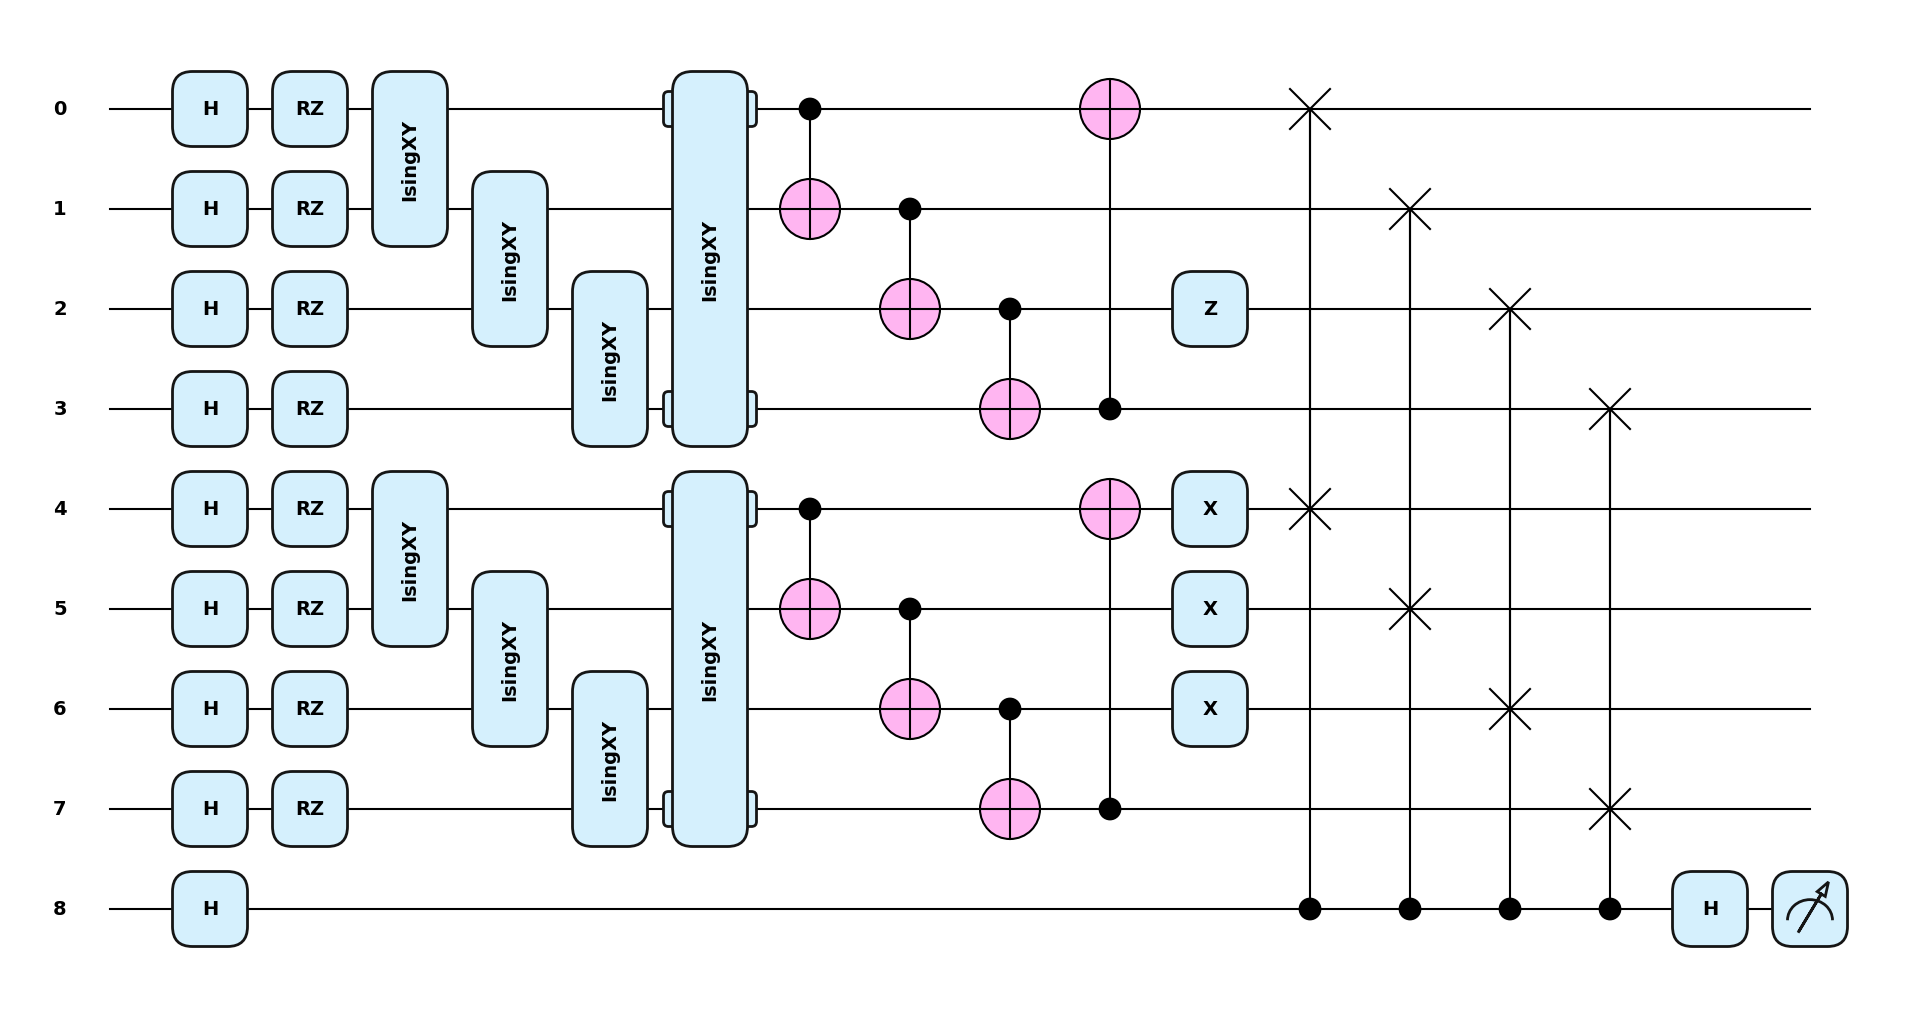

In [106]:
#With BitFlip Channel
import random
dev=qml.device("lightning.qubit",wires=9)

@qml.qnode(dev)
def circuit(x_train,x_test,probability=0.1):
    for i in range(len(x_train)*2):
        qml.Hadamard(wires=i)
    
    qml.Hadamard(wires=(len(x_train)*2))
    
    #qml.Barrier(wires=(len(x_train)*2)+1)
        
    for i in range(len(x_train)):
            qml.RZ(x_train[i],wires=i)
            
    
    for i in range(len(x_test)):
            qml.RZ(x_test[i],wires=i+len(x_train))
            
    for i in range(len(x_train)):        
            if i==len(x_train)-1:
                qml.IsingXY(pi/3,wires=[i,i-len(x_train)+1])
            else:
                qml.IsingXY(pi/3,wires=[i,i+1])
            
    for i in range(len(x_test)): 
            
            if i==len(x_test)-1:
                qml.IsingXY(pi/3,wires=[i+len(x_train),i+1])
            else:
                qml.IsingXY(pi/3,wires=[i+len(x_train),i+1+len(x_train)])
                
    for i in range(len(x_train)):        
            if i==len(x_train)-1:
                qml.CNOT(wires=[i,i-len(x_train)+1])
            else:
                qml.CNOT(wires=[i,i+1])
    for i in range(len(x_test)): 
            
            if i==len(x_test)-1:
                qml.CNOT(wires=[i+len(x_train),i+1])
            else:
                qml.CNOT(wires=[i+len(x_train),i+1+len(x_train)])

    
    
    for i in range(8):  # There are 9 wires in total
        # Check if bit-flip noise should be applied to this wire
        if random.random() < probability:
            qml.PauliX(wires=i)  # Apply bit-flip (Pauli-X) noise to the wire 

    for i in range(9):  # Iterate over all 9 wires
      rand_val = random.random()
    
      if random.random() < probability/3:
        qml.PauliX(wires=i)  # Apply bit-flip (Pauli-X)
      elif random.random() < probability:
        qml.PauliZ(wires=i)  # Apply phase-flip (Pauli-Z)
      elif random.random() < probability/3:
        qml.PauliX(wires=i)  # Apply bit-flip
        qml.PauliZ(wires=i)  # Apply phase-flip (equivalent to Pauli-Y)
                
    for i in range(len(x_train)):
        qml.CSWAP(wires=[(len(x_train)*2),i,i+len(x_train)])

        
    qml.Hadamard(wires=(len(x_train)*2))

   
    
    return qml.expval(qml.PauliZ(8))
    #return qml.probs(wires=(len(x_train)*2))

# Set PennyLane's built-in style (choose one: 'light', 'dark', or 'sketch')
qml.drawer.use_style("pennylane")  # Change to 'dark' for a dark mode, 'sketch' for a hand-drawn effect

# Draw the quantum circuit
fig, ax = qml.draw_mpl(circuit)(X_train[0], X_test[0])

# Show the circuit
plt.show()

In [107]:
result=circuit(X_train[0],X_test[1])
print(result)

0.027551906322836307


In [108]:
#y_train=y_train.to_numpy()
#y_test=y_test.to_numpy()

In [109]:
y_train[0]

0

In [110]:
y_test[0]

0

In [111]:
prediction=[]
for j in range(len(X_test)):
    a=[]
    for i in range(len(X_train)):
        if circuit(X_train[i],X_test[j])>0.96:
            a.append(y_train[i])
        
    count_0=a.count(0)
    count_1=a.count(1)
    if count_0>count_1:
        prediction.append(0)
    else:
         prediction.append(1)

import random

prediction = []
for j in range(len(X_test)):
    a = []
    random_values = [random.randint(0, len(X_train) - 1) for _ in range(20)]  # Fix: adjusted randint to valid range
    for i in random_values:
        if circuit(X_train[i], X_test[j]) > 0.98:
            a.append(y_train[i])

    if len(a) > 0:  # Check if 'a' is not empty
        count_0 = a.count(0)
        count_1 = a.count(1)

        if count_0 > count_1:
            prediction.append(0)
        elif count_1 > count_0:
            prediction.append(1)
        else:
            prediction.append(random.choice([0, 1]))  # Handle tie cases randomly or as needed
    else:
        prediction.append(random.choice([0, 1]))  # If no predictions, assign randomly


In [112]:
#prediction
prediction_n=np.array(prediction)

In [113]:
from sklearn.metrics import accuracy_score

accuracy=accuracy_score(y_test,prediction_n)
print(accuracy)

0.9649122807017544


# Classical KNN

In [114]:
from sklearn.neighbors import KNeighborsRegressor


# Create and train the KNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_regressor.predict(X_test)

# Convert probabilities to binary predictions
y_pred_binary = (y_pred > 0.5).astype(int)

In [115]:
accuracy=accuracy_score(y_test,y_pred_binary)
print(accuracy)

0.9298245614035088
